In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29587812c6de7302afc0dccc50fa1fa


In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | amderma
City not found. Skipping...
Processing Record 8 of Set 1 | faanui
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | tongliao
Processing Record 12 of Set 1 | moron
Processing Record 13 of Set 1 | vardo
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | yunjinghong
City not found. Skipping...
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | ushuaia
Processing Rec

Processing Record 39 of Set 4 | inuvik
Processing Record 40 of Set 4 | vanavara
Processing Record 41 of Set 4 | manama
Processing Record 42 of Set 4 | vawkavysk
Processing Record 43 of Set 4 | gornopravdinsk
Processing Record 44 of Set 4 | lagoa
Processing Record 45 of Set 4 | ulaanbaatar
Processing Record 46 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | dunedin
Processing Record 49 of Set 4 | ptuj
Processing Record 50 of Set 4 | ribeira grande
Processing Record 1 of Set 5 | isangel
Processing Record 2 of Set 5 | livingston
Processing Record 3 of Set 5 | sosnovka
Processing Record 4 of Set 5 | ucluelet
Processing Record 5 of Set 5 | yerbogachen
Processing Record 6 of Set 5 | kanie
Processing Record 7 of Set 5 | arkhangelskoye
Processing Record 8 of Set 5 | namibe
Processing Record 9 of Set 5 | salmas
Processing Record 10 of Set 5 | conceicao das alagoas
Processing Record 11 of Set 5 | kloulklubed
Processin

Processing Record 26 of Set 8 | abu samrah
Processing Record 27 of Set 8 | airai
Processing Record 28 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 29 of Set 8 | amuntai
Processing Record 30 of Set 8 | ailigandi
Processing Record 31 of Set 8 | palmer
Processing Record 32 of Set 8 | port charlotte
Processing Record 33 of Set 8 | san patricio
Processing Record 34 of Set 8 | koson
Processing Record 35 of Set 8 | hibbing
Processing Record 36 of Set 8 | morondava
Processing Record 37 of Set 8 | xiashi
Processing Record 38 of Set 8 | yenagoa
Processing Record 39 of Set 8 | goksun
Processing Record 40 of Set 8 | alice springs
Processing Record 41 of Set 8 | macaboboni
City not found. Skipping...
Processing Record 42 of Set 8 | ko samui
Processing Record 43 of Set 8 | nalut
Processing Record 44 of Set 8 | toliary
City not found. Skipping...
Processing Record 45 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 46 of Set 8 | port elizabeth
Processing Record 47 of Set 

Processing Record 16 of Set 12 | tarudant
City not found. Skipping...
Processing Record 17 of Set 12 | nkowakowa
Processing Record 18 of Set 12 | venado tuerto
Processing Record 19 of Set 12 | okato
Processing Record 20 of Set 12 | lompoc
Processing Record 21 of Set 12 | puerto montt
Processing Record 22 of Set 12 | llandrindod wells
Processing Record 23 of Set 12 | bonthe
Processing Record 24 of Set 12 | whitehorse
Processing Record 25 of Set 12 | znamenskoye
Processing Record 26 of Set 12 | chimoio
Processing Record 27 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 28 of Set 12 | metsavan
Processing Record 29 of Set 12 | kokkola
Processing Record 30 of Set 12 | miles city
Processing Record 31 of Set 12 | beloha
Processing Record 32 of Set 12 | narsaq
Processing Record 33 of Set 12 | york
Processing Record 34 of Set 12 | tabas
Processing Record 35 of Set 12 | thomaston
Processing Record 36 of Set 12 | saint-denis
Processing Record 37 of Set 12 | nemuro
Processing R

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,70.11,61,87,16.96,PF,2021-08-04 00:14:31
1,Vaini,-21.2000,-175.2000,73.56,88,40,14.97,TO,2021-08-04 00:18:24
2,Bredasdorp,-34.5322,20.0403,54.72,82,36,3.44,ZA,2021-08-04 00:18:24
3,New Norfolk,-42.7826,147.0587,52.92,83,72,1.01,AU,2021-08-04 00:18:24
4,Faanui,-16.4833,-151.7500,79.20,72,42,9.62,PF,2021-08-04 00:18:25
5,Busselton,-33.6500,115.3333,43.09,77,74,3.02,AU,2021-08-04 00:18:25
6,Kapaa,22.0752,-159.3190,84.18,76,90,4.00,US,2021-08-04 00:18:26
7,Tongliao,43.6125,122.2653,68.94,94,100,11.97,CN,2021-08-04 00:18:26
8,Moron,-34.6534,-58.6198,55.98,83,12,3.62,AR,2021-08-04 00:18:26
9,Vardo,70.3705,31.1107,46.15,96,100,35.03,NO,2021-08-04 00:18:27


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-08-04 00:14:31,-23.1203,-134.9692,70.11,61,87,16.96
1,Vaini,TO,2021-08-04 00:18:24,-21.2000,-175.2000,73.56,88,40,14.97
2,Bredasdorp,ZA,2021-08-04 00:18:24,-34.5322,20.0403,54.72,82,36,3.44
3,New Norfolk,AU,2021-08-04 00:18:24,-42.7826,147.0587,52.92,83,72,1.01
4,Faanui,PF,2021-08-04 00:18:25,-16.4833,-151.7500,79.20,72,42,9.62
5,Busselton,AU,2021-08-04 00:18:25,-33.6500,115.3333,43.09,77,74,3.02
6,Kapaa,US,2021-08-04 00:18:26,22.0752,-159.3190,84.18,76,90,4.00
7,Tongliao,CN,2021-08-04 00:18:26,43.6125,122.2653,68.94,94,100,11.97
8,Moron,AR,2021-08-04 00:18:26,-34.6534,-58.6198,55.98,83,12,3.62
9,Vardo,NO,2021-08-04 00:18:27,70.3705,31.1107,46.15,96,100,35.03


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1628037772.426072

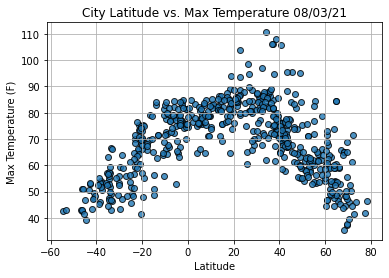

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

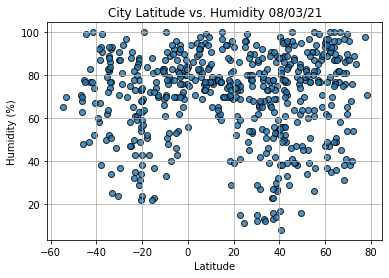

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

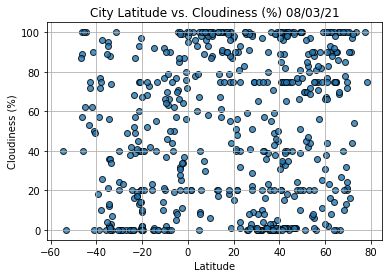

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

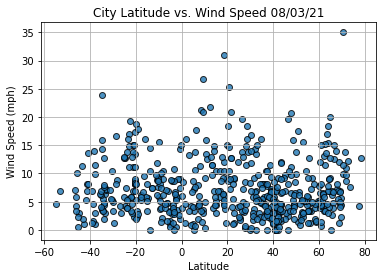

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()